In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import simpson

In [46]:
class MobiusStrip:
    def __init__(self,R,w,n):
        self.R = R
        self.w = w
        self.n = n
        self.u_range = np.linspace(0, 2*np.pi, n)
        self.v_range = np.linspace(-w/2, w/2, n)
        self.points = None
        self.generate_mesh()
    
    def generate_mesh(self):
        u, v = np.meshgrid(self.u_range, self.v_range)
        x = (self.R + v * np.cos(u/2)) * np.cos(u)
        y = (self.R + v * np.cos(u/2)) * np.sin(u)
        z = v * np.sin(u/2)
        
        self.points = np.stack((x, y, z), axis=-1)
    
    def cal_surface_area(self):
        
        u, v = np.meshgrid(self.u_range, self.v_range)
        
        dx_du = - (self.R + v * np.cos(u/2)) * np.sin(u) - 0.5 * v * np.sin(u/2) * np.cos(u)
        dy_du = (self.R + v * np.cos(u/2)) * np.cos(u) - 0.5 * v * np.sin(u/2) * np.sin(u)
        dz_du = 0.5 * v * np.cos(u/2)
        
        dx_dv = np.cos(u/2) * np.cos(u)
        dy_dv = np.cos(u/2) * np.sin(u)
        dz_dv = np.sin(u/2)
        
        cross_x = dy_du * dz_dv - dz_du * dy_dv
        cross_y = dz_du * dx_dv - dx_du * dz_dv
        cross_z = dx_du * dy_dv - dy_du * dx_dv
        
        magnitude = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)
        
        area = simpson(simpson(magnitude, self.v_range), self.u_range)
        
        return area
    
    def cal_edge_length(self):
        u = self.u_range
        v_top = self.w/2 * np.ones_like(u)
        v_bottom = -self.w/2 * np.ones_like(u)
        
        x_top = (self.R + v_top * np.cos(u/2)) * np.cos(u)
        y_top = (self.R + v_top * np.cos(u/2)) * np.sin(u)
        z_top = v_top * np.sin(u/2)
        
        x_bottom = (self.R + v_bottom * np.cos(u/2)) * np.cos(u)
        y_bottom = (self.R + v_bottom * np.cos(u/2)) * np.sin(u)
        z_bottom = v_bottom * np.sin(u/2)
        
        dx_top = np.gradient(x_top, u)
        dy_top = np.gradient(y_top, u)
        dz_top = np.gradient(z_top, u)
        
        dx_bottom = np.gradient(x_bottom, u)
        dy_bottom = np.gradient(y_bottom, u)
        dz_bottom = np.gradient(z_bottom, u)
        
        ds_top = np.sqrt(dx_top**2 + dy_top**2 + dz_top**2)
        ds_bottom = np.sqrt(dx_bottom**2 + dy_bottom**2 + dz_bottom**2)
        
        length = simpson(ds_top, u)
        
        return length
    
    def plot(self):
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        x = self.points[:, :, 0]
        y = self.points[:, :, 1]
        z = self.points[:, :, 2]
        
        ax.plot_surface(x, y, z, color='black', alpha=0.8, rstride=2, cstride=2)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Möbius Strip (R={self.R}, w={self.w})')
        
        plt.tight_layout()
        plt.show()

 5.0
 0.2
 100


C:\Users\Harshavardhan\AppData\Local\Temp\ipykernel_21228\2945300161.py:37: DeprecationWarning: You are passing x=[-0.1        -0.0979798  -0.0959596  -0.09393939 -0.09191919 -0.08989899
 -0.08787879 -0.08585859 -0.08383838 -0.08181818 -0.07979798 -0.07777778
 -0.07575758 -0.07373737 -0.07171717 -0.06969697 -0.06767677 -0.06565657
 -0.06363636 -0.06161616 -0.05959596 -0.05757576 -0.05555556 -0.05353535
 -0.05151515 -0.04949495 -0.04747475 -0.04545455 -0.04343434 -0.04141414
 -0.03939394 -0.03737374 -0.03535354 -0.03333333 -0.03131313 -0.02929293
 -0.02727273 -0.02525253 -0.02323232 -0.02121212 -0.01919192 -0.01717172
 -0.01515152 -0.01313131 -0.01111111 -0.00909091 -0.00707071 -0.00505051
 -0.0030303  -0.0010101   0.0010101   0.0030303   0.00505051  0.00707071
  0.00909091  0.01111111  0.01313131  0.01515152  0.01717172  0.01919192
  0.02121212  0.02323232  0.02525253  0.02727273  0.02929293  0.03131313
  0.03333333  0.03535354  0.03737374  0.03939394  0.04141414  0.04343434
  0.045454

Surface Area: 6.2833
Edge Length: 31.3965


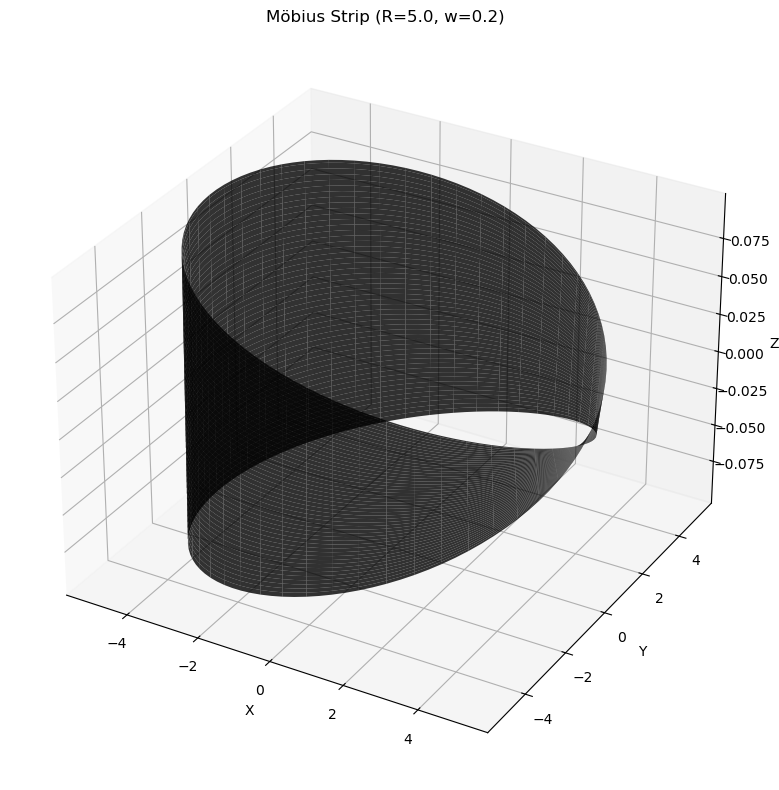

In [48]:
if __name__ == "__main__":
    R=float(input())
    W=float(input())
    N=int(input())
    mobius = MobiusStrip(R,W,N)
    surface_area = mobius.cal_surface_area()
    edge_length = mobius.cal_edge_length()
    print(f"Surface Area: {surface_area:.4f}")
    print(f"Edge Length: {edge_length:.4f}")
    mobius.plot()